# Survey data on popular programming, database, IDE

Used Data provided by Coursera IBM Data Analyst course
## Explore 
    1) Distribution
    2) Outliers
    3) Correlation 

In [1]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #일반 line graph 이외 
from scipy.stats import norm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#data provided by IBM 
df = pd.read_csv("m2_survey_data.csv", header=0)

In [3]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


In [4]:
df.shape #11398 rows x 85 columns

(11398, 85)

In [5]:
df.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,11398.000000,1.058900e+04,1.058200e+04,11276.000000,8972.000000,11111.000000
mean,12490.392437,7.570477e+05,1.315967e+05,42.064606,4.781071,30.778895
std,7235.461999,9.705598e+06,2.947865e+05,24.672741,4.567060,7.393686
min,4.000000,0.000000e+00,0.000000e+00,3.000000,0.000000,16.000000
25%,6264.250000,2.500000e+04,2.686800e+04,40.000000,2.000000,25.000000
50%,12484.000000,6.500000e+04,5.774500e+04,40.000000,4.000000,29.000000
75%,18784.750000,1.200000e+05,1.000000e+05,43.000000,5.000000,35.000000
max,25142.000000,7.000000e+08,2.000000e+06,1012.000000,99.000000,99.000000


In [6]:
#Data Cleaning
#null = df.isnull().sum()
#null
#df_drop=df.dropna()
#df.isnull().sum

1) Find the Distribution
  *Using the exchange rate (as of Feb 01, 2019) find the Salary converted to annual USD Salaries

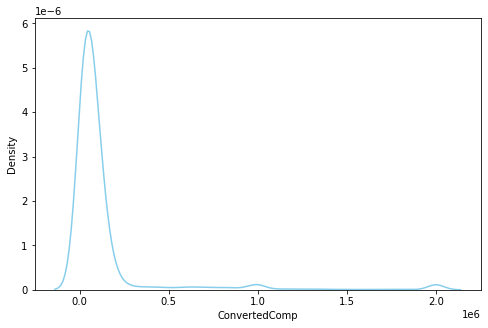

In [7]:
#Draw Distribution Curve
plt.figure(figsize=(8,5))
sns.distplot(a= df['ConvertedComp'], color = "skyblue", bins=20, hist=False)
plt.show()

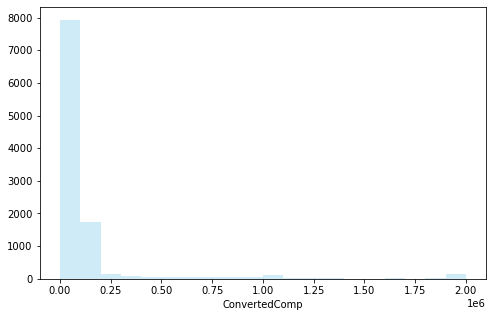

In [8]:
#Draw Historgram
plt.figure(figsize=(8,5))
sns.distplot(a=df['ConvertedComp'], kde = False, bins=20, hist=True, color = 'skyblue')
plt.show()

In [9]:
#find median
df['ConvertedComp'].median()

57745.0

In [10]:
#find mean
df['ConvertedComp'].mean()

# Per the distribution & histogram, the graph is Right Skewed
# * median < mean

131596.7316197316

# Gender Distribution

In [11]:
# Gender Distribution
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

In [12]:
#Find median of woman and man
women = df[df['Gender'] == 'Woman']
men = df[df['Gender'] == 'Man']

women["ConvertedComp"].median()

57708.0

In [13]:
men["ConvertedComp"].median()

57744.0

In [14]:
#Categorical variable
df.groupby(["Gender"])['ConvertedComp'].median()
#Median of ConvertedComp per Gender
# Same as above

Gender
Man                                                            57744.0
Man;Non-binary, genderqueer, or gender non-conforming          59520.0
Non-binary, genderqueer, or gender non-conforming              67142.0
Woman                                                          57708.0
Woman;Man                                                      21648.0
Woman;Man;Non-binary, genderqueer, or gender non-conforming    30244.0
Woman;Non-binary, genderqueer, or gender non-conforming        65535.5
Name: ConvertedComp, dtype: float64

In [15]:
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

In [16]:
#SERIES
df_gen2 = df['Gender']
df_gen2.name = 'GENDER'
df_gen2.index.name = 'GENDER_'
df_gen2

GENDER_
0        Man
1        Man
2        Man
3        Man
4        Man
        ... 
11393    Man
11394    Man
11395    Man
11396    Man
11397    Man
Name: GENDER, Length: 11398, dtype: object

In [17]:
#DataFrame
df_gen = df[['Gender']]
df_gen.columns = ['gender']
df_gen

,gender
GENDER_,
0,Man
1,Man
2,Man
3,Man
4,Man
...,...
11393,Man
11394,Man
11395,Man


In [18]:
#Use Only man & woman
only = df_gen.loc[(df_gen['gender'] == 'Man')|(df_gen['gender'] == 'Woman'),:]
gender_value = only.value_counts(normalize=True)
gender_value

gender
Man       0.934796
Woman     0.065204
dtype: float64

Text(0, 0.5, 'frequency')

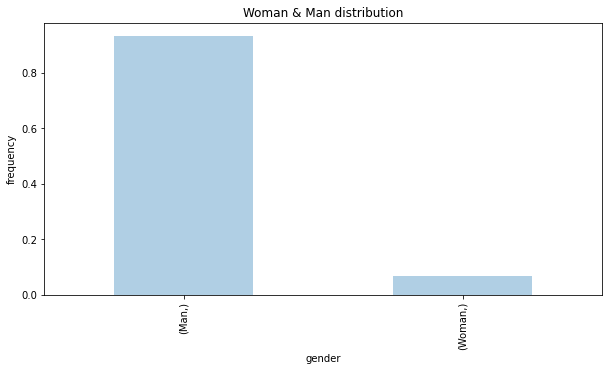

In [19]:
# Gender Distribution (Woman & Man only)
gender_value.plot(kind="bar", alpha = 0.35, figsize = (10,5))
plt.title('Woman & Man distribution')
plt.xlabel('gender')
plt.ylabel('frequency')

# Age distribution

In [20]:
df["Age"].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

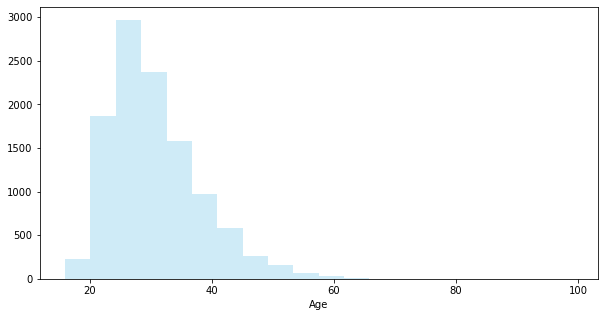

In [21]:
plt.figure(figsize = (10,5))
sns.distplot(a=df["Age"], bins=20, kde = False, hist = True, color = "skyblue")
plt.show()

# Finding Outliers 

<AxesSubplot:>

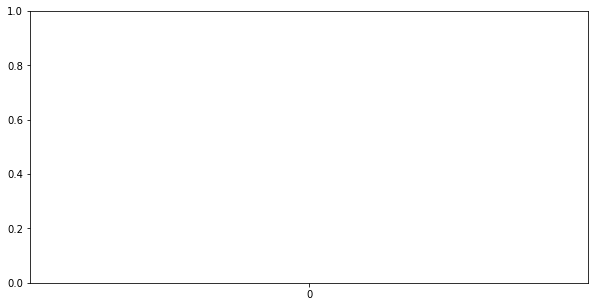

In [22]:
plt.figure(figsize = (10,5))
sns.boxplot(a=df["ConvertedComp"])

In [23]:
#Calculate outliers for ConvertedComp

df["ConvertedComp"].describe()

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

In [24]:
#25th percentile
Q1 = df["ConvertedComp"].quantile(0.25)
#75th percentile
Q3 = df["ConvertedComp"].quantile(0.75)
IQR = Q3 - Q1
IQR

73132.0

In [25]:
#Upper & lower bounds
#Q1 - 1.5*IQR, Q3 + 1.5*IQR
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR
upper

209698.0

In [26]:
more = df['ConvertedComp'] > upper
more.value_counts()

False    10519
True       879
Name: ConvertedComp, dtype: int64

In [27]:
less = df['ConvertedComp'] < lower
less.value_counts()

False    11398
Name: ConvertedComp, dtype: int64

In [28]:
# need to drop upper (less not necessary)
df2 = df[(df['ConvertedComp']) < upper].reset_index(drop=True)
df2.shape

(9703, 85)

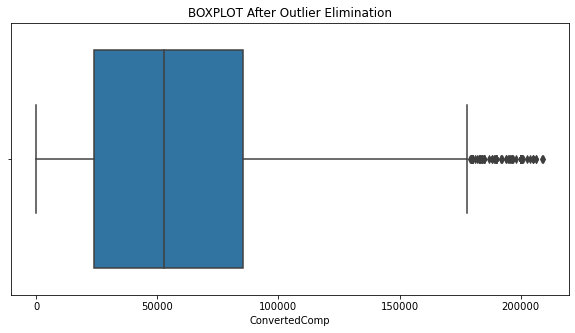

In [29]:
plt.figure(figsize = (10,5))
sns.boxplot(x=df2["ConvertedComp"]).set_title("BOXPLOT After Outlier Elimination")
plt.show() 
# Much better

In [30]:
#Overwrite 
df = df2

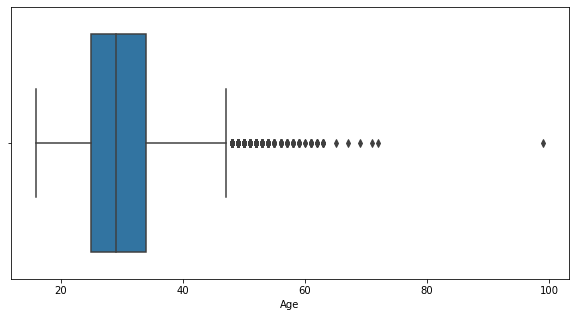

In [31]:
# Calculate outliers for age 
plt.figure(figsize = (10,5))
sns.boxplot(x=df["Age"])
plt.show()

In [32]:
age_Q1 = df["Age"].quantile(0.25)
age_Q1

25.0

In [33]:
age_Q3 = df["Age"].quantile(0.75)
age_Q3

34.0

In [34]:
df['Age'].describe()

count    9493.000000
mean       30.695860
std         7.346625
min        16.000000
25%        25.000000
50%        29.000000
75%        34.000000
max        99.000000
Name: Age, dtype: float64

In [35]:
age_IQR = age_Q3 - age_Q1
age_upper = age_Q3 + age_IQR * 1.5
age_upper #above 47.5 is considered as outlier..need to think more
#mosto of the survey respndents are among 25~34 

47.5

In [36]:
age_more = df["Age"] > age_upper
age_more.value_counts()

False    9357
True      346
Name: Age, dtype: int64

In [37]:
#Eliminate / DROP Outliers
df3= df[(df['Age']) < age_upper].reset_index(drop=True)
df3.shape

(9147, 85)

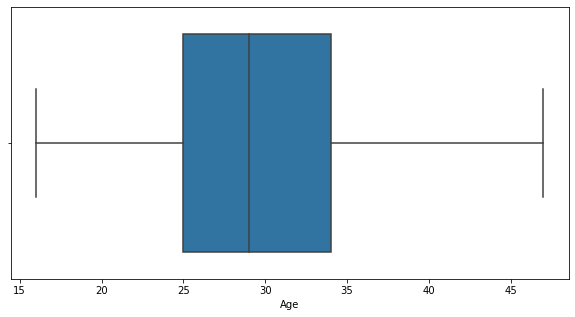

In [38]:
plt.figure(figsize = (10,5))
sns.boxplot(x=df3["Age"])
plt.show()

In [39]:
#overwrite
df = df3

In [40]:
df.shape

(9147, 85)

# Correlation 

In [41]:
df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.019234,0.011426,-0.018540,0.002247,-0.004321
CompTotal,-0.019234,1.000000,-0.064603,0.004552,0.015852,0.016591
ConvertedComp,0.011426,-0.064603,1.000000,0.032072,-0.083564,0.383649
WorkWeekHrs,-0.018540,0.004552,0.032072,1.000000,0.038737,0.039109
CodeRevHrs,0.002247,0.015852,-0.083564,0.038737,1.000000,0.001185
Age,-0.004321,0.016591,0.383649,0.039109,0.001185,1.000000


In [42]:
df['Country'].value_counts()

United States        2356
India                 696
United Kingdom        614
Germany               588
Canada                336
                     ... 
Somalia                 1
Rwanda                  1
Brunei Darussalam       1
Yemen                   1
Sudan                   1
Name: Country, Length: 128, dtype: int64